In [4]:
import matplotlib.pyplot as plt
import numpy as np

## How does sigma vary with tau?

This is extremely confusing when we also consider the observed data with the embedded inverse relationship: If we calculate ln(k) = ln(A) - ln(t) and then regress ln(k) versus ln(t), then the result depends on any relationship between ln(A) and ln(t):

1) ln(A) is independent of t: gradient of regression = -1 (simple spurious correlation)
2) ln(A) varies with t but ln(k) doesn't. So ln(A) = ln(B) + c*ln(t), and c = 1, so overall the gradient of the regression = 0
3) ln(A) varies with t, A = kt^m: gradient of regression is > 0

So it's about how much we're between 0 (k independent of t) and -1 (pure spurious correlation).

But if we just look at the fitted coefficients it becomes simpler.

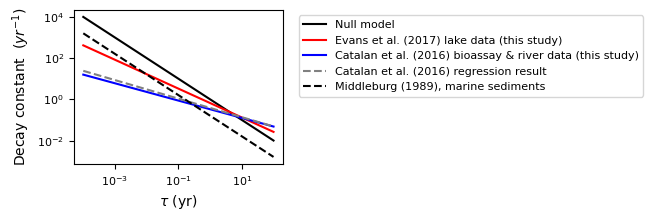

In [8]:
tau_max = 20  # years

# Range of tau values
tau = np.linspace(0.0001, 100, 10000)
ln_tau = np.log(tau)

# Null model, k = 1/t
k_null = 1/tau

# Add Catalan et al's line for comparison
# log(k) = -0.448 * ln(tau) -0.961
# ignoring potential for back-transformation bias for now, as most people do
k_catalan = np.exp((-0.45 * np.log(tau) - 0.96))

k_middelburg = np.exp(-0.95 * np.log(tau) - 0.81)

# Vollenweider, constant sigma
sigma_constant = 0.4

# Vollenweider sigma a function of tau
k = 0.66
m = -0.70
sigma = k * tau ** m

# My results from re-analysis of Catalan et al. data
k_cat_data_constant_k = 0.53
k_cat_data_varying_k = 0.33 * tau ** -0.42

# Plot sigma vs tau
fig, ax = plt.subplots(figsize=(2.7, 2))

plt.plot(tau, k_null, color='black', label=r'Null model')
plt.plot(tau, sigma, color='red', label=r'Evans et al. (2017) lake data (this study)')
plt.plot(tau, k_cat_data_varying_k, color='blue', label='Catalan et al. (2016) bioassay & river data (this study)')
plt.plot(tau, k_catalan, color='gray', ls='--', label='Catalan et al. (2016) regression result')
plt.plot(tau, k_middleburg, color='black', ls='--', label='Middleburg (1989), marine sediments')

# ax.set_xlim(xmin=0.001, xmax=80)
# ax.set_ylim(ymin=0.02, ymax=2)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\tau$ (yr)', fontsize=10)
plt.ylabel(r'Decay constant  $(yr^{-1})$', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.legend(bbox_to_anchor=(1.05, 1), fontsize=8)

# Add the plot location label in bold text to the top right corner
# plt.text(0.95, 0.98, 'c', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='right', va='top')

# plt.tight_layout()
plt.savefig(r'graphs/fitted_sigma_vs_tau.png', bbox_inches='tight')
plt.show()